In [ ]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

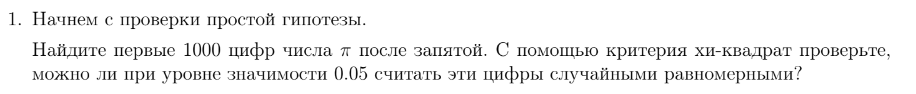

[ 93. 116. 103. 102.  93.  97.  94.  95. 101. 106.]
Результаты теста хи-квадрат:
Хи-квадрат статистика: 4.739999999999999
Количество степеней свободы: 9
Критическое значение для уровня значимости 0.05: 16.918977604620448
Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05: True


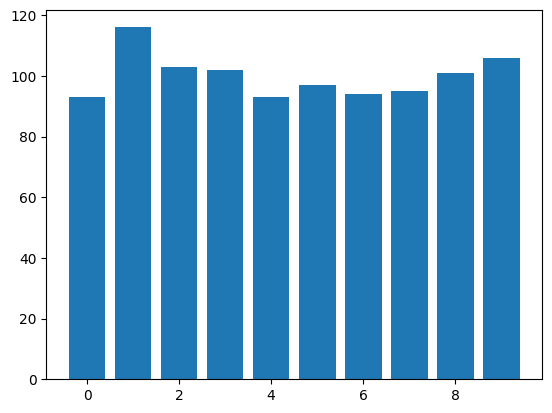

In [ ]:
from mpmath import mp
mp.dps = 1001
num1 = mp.pi
num2 = num1 - np.floor(num1)
num2 *= 10
digits = [0,1,2,3,4,5,6,7,8,9]
hypothesis = [100 for i in range(10)]
counters = np.zeros(10)
for i in range (1000):
    counters[int(np.floor(num2))] +=1
    num1 = num2
    num2 = num1 - np.floor(num1)
    num2 *= 10
print(counters)
plt.bar(digits, counters)
chisq, pvalue = sts.chisquare(f_obs=counters, f_exp=hypothesis)

degrees_of_freedom = 9
critical_value = sts.chi2.ppf(0.95, df=degrees_of_freedom)

is_uniform = chisq < critical_value

print("Результаты теста хи-квадрат:")
print("Хи-квадрат статистика:", chisq)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05:", is_uniform)


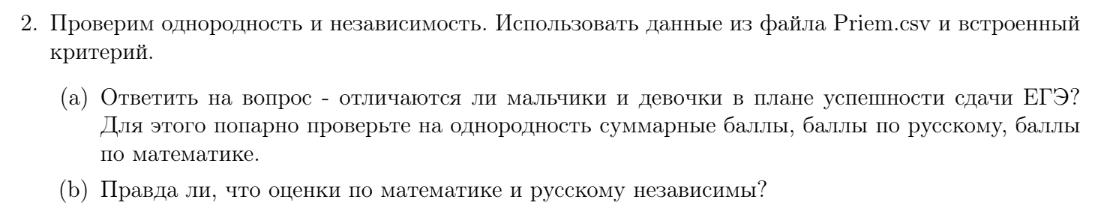

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Priem.csv', encoding='cp1251',sep=";")

cut_bins = [0, 70, 80, 90, 100]
cut_bins_sum = [0, 140, 160, 180, 200]
df['Sum'] = df['ЕГЭ...рус.яз.'] + df['ЕГЭ...матем.']

df1 = df[df['Пол'] == 'ЖЕНСКИЙ']
df2 = df[df['Пол'] == 'МУЖСКОЙ']


count_female_rus = df1.groupby(pd.cut(df1['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_female_math = df1.groupby(pd.cut(df1['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_female_avg = df1.groupby(pd.cut(df1['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()

count_male_rus = df2.groupby(pd.cut(df2['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_male_math = df2.groupby(pd.cut(df2['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_male_avg = df2.groupby(pd.cut(df2['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()


size1 = np.sum(count_male_rus)
size2 = np.sum(count_female_rus)

table = np.array([count_female_rus, count_male_rus])
# chisq, pvalue = sts.chisquare(f_obs=count_female_rus, f_exp=count_male_rus * size2/size1)
chisq = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")



degrees_of_freedom = 3
critical_value = sts.chi2.ppf(0.95, df=degrees_of_freedom)
homogeneity = chisq < critical_value

print("Результаты теста хи-квадрат для русского языка:")
print("Хи-квадрат статистика:", chisq)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными результаты по русскому языку:", homogeneity)

for i in range(3):
  print("")

size3 = np.sum(count_male_math)
size4 = np.sum(count_female_math)

table = np.array([count_female_math, count_male_math])
# chisq2, pvalue = sts.chisquare(f_obs=count_female_math, f_exp=count_male_math * size4/size3)
chisq2 = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity2 = chisq2 < critical_value
print("Результаты теста хи-квадрат для математики:")
print("Хи-квадрат статистика:", chisq2)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными результаты по математике:", homogeneity2)

for i in range(3):
  print("")

size5 = np.sum(count_male_avg)
size6 = np.sum(count_female_avg)

table = np.array([count_female_avg, count_male_avg])
# chisq3, pvalue = sts.chisquare(f_obs=count_female_avg, f_exp=count_male_avg * size6/size5)
chisq3 = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity3 = chisq3 < critical_value
print("Результаты теста хи-квадрат для суммарных баллов:")
print("Хи-квадрат статистика:", chisq3)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать однородными суммарные результаты:", homogeneity3)

for i in range(3):
  print("")

df_test_1 = df.groupby(pd.cut(df['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
df_test_2 = df.groupby(pd.cut(df['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()

table = np.array([df_test_1, df_test_2])
res = sts.chi2_contingency(table).statistic
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
test = res < critical_value
print("Результаты теста хи-квадрат для независимости:")
print("Хи-квадрат статистика:", res)
print("Количество степеней свободы:", degrees_of_freedom)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать результаты независимыми:", test)

p-value: 1.786770121758677e-15
Результаты теста хи-квадрат для русского языка:
Хи-квадрат статистика: 71.76586788705605
Количество степеней свободы: 3
Критическое значение для уровня значимости 0.05: 7.814727903251179
Можно ли считать однородными результаты по русскому языку: False



p-value: 0.6108444846057453
Результаты теста хи-квадрат для математики:
Хи-квадрат статистика: 1.8188365997280997
Количество степеней свободы: 3
Критическое значение для уровня значимости 0.05: 7.814727903251179
Можно ли считать однородными результаты по математике: True



p-value: 2.0998881447778616e-05
Результаты теста хи-квадрат для суммарных баллов:
Хи-квадрат статистика: 24.36103810237603
Количество степеней свободы: 3
Критическое значение для уровня значимости 0.05: 7.814727903251179
Можно ли считать однородными суммарные результаты: False



p-value: 9.561716545330092e-18
Результаты теста хи-квадрат для независимости:
Хи-квадрат статистика: 82.36091289508188
Количество степеней свободы: 3
Критичес

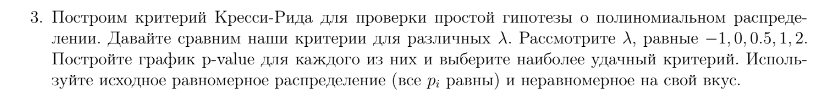

In [ ]:
L = [-1, 0, 0.5, 1, 2]
n = 10000
uniform_dist = [1/10 for i in range (10)]
sample = sts.multinomial.rvs(n, uniform_dist)
print("Для равномерно распределенных величин:")
for lambda_test in L:
    statistic, pvalue = sts.power_divergence(sample, lambda_=lambda_test)
    print(f"P-Value for λ = {lambda_test}: {pvalue}")
    #стандартный уровень доверия здесь alpha = 0.05

print("")

nonuniform_dist = [0.1,0.1,0.15,0.05,0.1,0.1,0.05,0.1,0.1,0.15]
sample1 = sts.multinomial.rvs(n, nonuniform_dist)
print("Для неравномерно распределенных величин:")
for lambda_test in L:
    statistic, pvalue1 = sts.power_divergence(sample1, lambda_=lambda_test)
    print(f"P-Value for λ = {lambda_test}: {pvalue1}")
    #стандартный уровень доверия здесь alpha = 0.05

Для равномерно распределенных величин:
P-Value for λ = -1: 0.5992695718163568
P-Value for λ = 0: 0.5948196499431366
P-Value for λ = 0.5: 0.5925192235324348
P-Value for λ = 1: 0.5901679415577757
P-Value for λ = 2: 0.5853111811188938

Для неравномерно распределенных величин:
P-Value for λ = -1: 6.636462038556137e-270
P-Value for λ = 0: 1.8175247346059066e-239
P-Value for λ = 0.5: 1.8142251681838742e-230
P-Value for λ = 1: 7.669397887564248e-225
P-Value for λ = 2: 2.5980892334004575e-222
